<a href="https://colab.research.google.com/github/vivekvardhannali/vehicle_routing_problem/blob/main/vrp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!pip install matplotlib deap
import random
import matplotlib.pyplot as  plt
from deap import base,creator,tools,algorithms

In [87]:
num_locations=100
locations=[(random.randint(0, 1000), random.randint(0, 1000)) for t in range(100)]
print(locations)
depot=(500,500)
num_vehicles=10

[(228, 589), (103, 197), (233, 657), (178, 372), (185, 529), (387, 978), (996, 119), (815, 219), (162, 249), (750, 612), (260, 343), (852, 880), (421, 695), (290, 341), (129, 221), (311, 190), (512, 409), (305, 791), (823, 305), (624, 453), (438, 812), (5, 177), (270, 597), (524, 440), (439, 197), (274, 178), (763, 55), (747, 829), (597, 973), (365, 253), (447, 768), (464, 651), (686, 484), (640, 926), (887, 840), (248, 283), (677, 586), (563, 652), (640, 369), (181, 636), (483, 850), (237, 364), (414, 854), (792, 94), (342, 704), (181, 392), (982, 413), (379, 833), (340, 576), (867, 67), (273, 499), (782, 918), (399, 983), (161, 378), (806, 252), (893, 654), (523, 62), (634, 938), (426, 426), (307, 107), (272, 484), (801, 378), (224, 255), (414, 869), (595, 714), (379, 163), (295, 899), (452, 796), (971, 277), (945, 783), (403, 444), (736, 325), (682, 238), (346, 213), (574, 594), (715, 705), (716, 948), (417, 130), (780, 649), (901, 784), (590, 564), (909, 347), (765, 255), (157, 296

In [88]:
creator.create("FitnessMin",base.Fitness,weights=(-1.0,-1.0))
creator.create("Individual",list,fitness=creator.FitnessMin)

In [89]:

toolbox=base.Toolbox()
toolbox.register("indices",random.sample,range(num_locations),num_locations)
toolbox.register("individual",tools.initIterate,creator.Individual,toolbox.indices)
toolbox.register("population",tools.initRepeat,list,toolbox.individual)


In [90]:
import numpy as np
def eval(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate",eval)
toolbox.register("mate",tools.cxPartialyMatched)
toolbox.register("mutate",tools.mutShuffleIndexes,indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [91]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


gen	nevals	avg    	min    
0  	300   	25486.3	301.711
1  	224   	24983.5	339.448
2  	235   	24644.8	356.181
3  	225   	24378.7	321.188
4  	236   	24400.9	372.197
5  	224   	24401.3	317.208
6  	215   	24237.1	374.946
7  	233   	24212.2	377.34 
8  	259   	24199.6	204.441
9  	222   	24173.7	204.441
10 	230   	24129.8	204.441
11 	235   	24146.2	249.277
12 	243   	24114  	386.182
13 	235   	24048.4	324.959
14 	215   	23797.1	323.355
15 	224   	23738.9	315.912
16 	224   	23615.5	303.871
17 	238   	23439.5	302.132
18 	204   	23199.4	321.512
19 	223   	22997.2	221.018
20 	221   	22773.4	315.737
21 	212   	22411.7	312.293
22 	239   	22094.1	317.393
23 	243   	22062.3	319.301
24 	216   	21868.7	338.881
25 	245   	21805.9	393.08 
26 	222   	21610.2	324.442
27 	237   	21599.5	367.555
28 	212   	21341.4	391.362
29 	236   	21218.3	299.604
30 	234   	21098  	276.911
31 	227   	20942.3	299.604
32 	231   	20865.1	334.195
33 	235   	20618.2	283.217
34 	214   	20441.6	283.217
35 	222   	20190.3	283.217
3

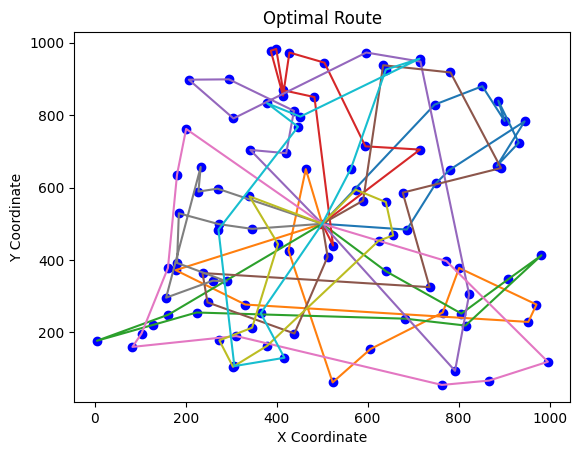

In [93]:
import numpy as np
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    # Run the genetic algorithm
    algorithms.eaSimple(population=pop, toolbox=toolbox, cxpb=0.7, mutpb=0.2, ngen=400, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()
